<h2 align="center">Лабораторна робота №6</h2>
<p style="margin-left: 70%">Роботу виконав студент з групи ФІ-21, Беркута Володимир</p>
<p style="margin-left: 50px"><i><b>Тема роботи:</b></i> "Цифрова стеганографія засобами найменш значущого біта".</br>
<i><b>Мета роботи:</b></i> навчитисб вбудовувати цифровий водяний знак у зображення методом найменшого значущого біта.</p>

<h2 align="center">Завдання до лабораторної роботи</h2>
<ol>
    <li>Ознайомитись із усіма теоретичними відомостями до лабораторної роботи.</li>
    <li>Виконати проєктування програмного додатку для PC, який:</li>
        <ol style="list-style-type:lower-alpha">
            <li>Виконує вбудовування водяного знаку зображення. Для процесу вбудовування водяний знак перетворити до бінарного(чорно-білого, не сірого!). Використати для вбудовування метод найменш значущого біта. Параметр "номер бітової площини"(натуральне число, менше за 9) вивести на форму головного вікна для відображення різниці в результатах вбудовування. Водяний знак вбудовувати у канал <i>Blue</i>. Передбачити випадок різних розмірів вхідного зображення (контейнера) та водяного знаку. Якщо вхідне зображення більше за водяний знак, виконати вбудування циклічно та періодично для всього вхідного зображення (замостити вхідне зображення водяним знаком). Якщо вхідне зображення менше за водяний знак, вбудувати частину водяного знаку для всього вхідного зображення.</li>
            <li>Здійснити вбудовування текстової інформації (яка представленна побітово) у вхідне зображення на основі методу найменшого значущого біта.</li>
            <li>Додатковий бал передбачається з встворення методу, який виконує вилучення водяного знаку із заповненого контейнера (зображення з водяним знаком) для завдання 7 даної лабораторної роботи.</li>
        </ol>
    <li>Усі пункти завдання лабораторної роботи виконати в одному багатовіконному програмному додатку.</li>
    <li>Навести основні етапи проєктування додатку, зокрема, вкзаати діаграму класів, діаграму пакетів та діаграму прецедентів користування додатком.</li>

<h2 align="center">Виконання лабораторної роботи</h2>

Setup complete


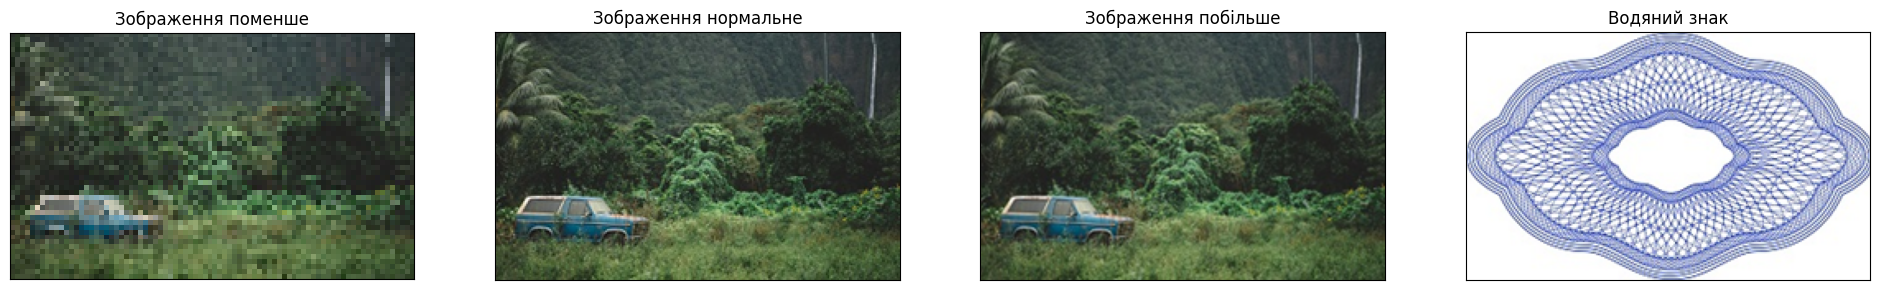

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import warnings

warnings. filterwarnings('ignore')

input_img = cv.imread("./img/InputImage.png")
input_img = cv.cvtColor(input_img, cv.COLOR_BGR2RGB)

small_input_img = cv.resize(input_img, (int(input_img.shape[1]/3), int(input_img.shape[0]/3)) )
big_input_img = cv.resize(input_img, (input_img.shape[1]*3, input_img.shape[0]*3) )

wm = cv.imread("./img/WM.png")
wm = cv.cvtColor(wm, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 4, figsize=(24, 6))

ax[0].set_title("Зображення поменше")
ax[0].imshow(small_input_img)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].set_title("Зображення нормальне")
ax[1].imshow(input_img)
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].set_title("Зображення побільше")
ax[2].imshow(big_input_img)
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[3].set_title("Водяний знак")
ax[3].imshow(wm)
ax[3].set_xticks([])
ax[3].set_yticks([])

print("Setup complete")

<h3 align="center">Пре операції для керування бітовою площиною</h3>

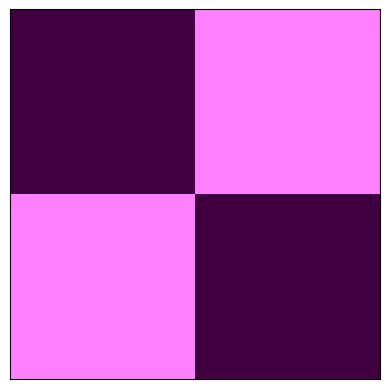

In [2]:
fig, ax = plt.subplots()
test_array = np.array([[[64,   0,   64], [255, 128, 255]], 
                       [[255, 128, 255], [64,   0,   64]]]).astype("uint8")
ax.imshow(test_array)
ax.set_xticks([])
ax.set_yticks([])
display()

In [3]:
def to_binary(x):
    return format(x, '08b')
    
_to_binary = np.vectorize(to_binary)


In [4]:
bin_test_array = _to_binary(test_array)
bin_test_array

array([[['01000000', '00000000', '01000000'],
        ['11111111', '10000000', '11111111']],

       [['11111111', '10000000', '11111111'],
        ['01000000', '00000000', '01000000']]], dtype='<U8')

In [5]:
def get_bin_space(arr: np.ndarray, bin_space: int) -> np.ndarray[str] | None:
    if 1>bin_space or bin_space>8:
        print(f"Bin space number is not correct: {bin_space}")
        return None
    bin_space = 8 - bin_space

    arr_shape = arr.shape
    add_arr = np.reshape(arr.copy(), arr.size)
    for i in range(arr.size):
        add_arr[i] = add_arr[i][bin_space]
    return np.reshape(add_arr, arr_shape)


In [6]:
bin_arr = get_bin_space(bin_test_array, 7)
bin_arr

array([[['1', '0', '1'],
        ['1', '0', '1']],

       [['1', '0', '1'],
        ['1', '0', '1']]], dtype='<U8')

In [7]:
def change_bin_space(arr: np.ndarray, bin_arr: np.ndarray, bin_space: int) -> np.ndarray[str] | None:
    if 1>bin_space or bin_space>8:
        print(f"Bin space number is not correct: {bin_space}")
        return None
    bin_space = 8 - bin_space
    
    if arr.shape!=bin_arr.shape:
        print(f"Error shape: arr shape is {arr.shape}, bin_arr shape is {bin_arr.shape}")
        return None

    arr_shape = arr.shape
    bin_arr = np.reshape(bin_arr, bin_arr.size)

    add_arr = np.reshape(arr.copy(), arr.size)
    for i in range(arr.size):
        add_arr[i] = add_arr[i][:bin_space]+bin_arr[i]+add_arr[i][bin_space+1:]
    
    return np.reshape(add_arr, arr_shape)
        

In [8]:
change_bin_space(bin_test_array, bin_arr, 1)

array([[['01000001', '00000000', '01000001'],
        ['11111111', '10000000', '11111111']],

       [['11111111', '10000000', '11111111'],
        ['01000001', '00000000', '01000001']]], dtype='<U8')

In [9]:
back_to_int = np.vectorize(lambda x: int(x, 2))


In [10]:
back_to_int(change_bin_space(bin_test_array, bin_arr, 1))

array([[[ 65,   0,  65],
        [255, 128, 255]],

       [[255, 128, 255],
        [ 65,   0,  65]]])

In [11]:
def xor_bin_space(arr: np.ndarray, bin_arr: np.ndarray, bin_space: int) -> np.ndarray[str] | None:
    if 1>bin_space or bin_space>8:
        print(f"Bin space number is not correct: {bin_space}")
        return None
    bin_space = 8 - bin_space
    
    if arr.shape!=bin_arr.shape:
        print(f"Error shape: arr shape is {arr.shape}, bin_arr shape is {bin_arr.shape}")
        return None

    arr_shape = arr.shape
    bin_arr = np.reshape(bin_arr, bin_arr.size)

    add_arr = np.reshape(arr.copy(), arr.size)
    for i in range(arr.size):
        xor_value = int(add_arr[i][bin_space])^int(bin_arr[i])  # -> int
        add_arr[i] = add_arr[i][:bin_space]+str(xor_value)+add_arr[i][bin_space+1:]
    
    return np.reshape(add_arr, arr_shape)

In [12]:
xor_bin_space(bin_test_array, bin_arr, 1)

array([[['01000001', '00000000', '01000001'],
        ['11111110', '10000000', '11111110']],

       [['11111110', '10000000', '11111110'],
        ['01000001', '00000000', '01000001']]], dtype='<U8')

In [13]:
xor_bin_space(xor_bin_space(bin_test_array, bin_arr, 1), bin_arr, 1)

array([[['01000000', '00000000', '01000000'],
        ['11111111', '10000000', '11111111']],

       [['11111111', '10000000', '11111111'],
        ['01000000', '00000000', '01000000']]], dtype='<U8')

<h3 align="center">Пре операція для WM</h3>

In [14]:
def get_bw_wm(wm: np.ndarray) -> np.ndarray:
    gray_wm = cv.cvtColor(wm, cv.COLOR_RGB2GRAY)
    (thresh, bw_wm) = cv.threshold(gray_wm, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    return bw_wm
    

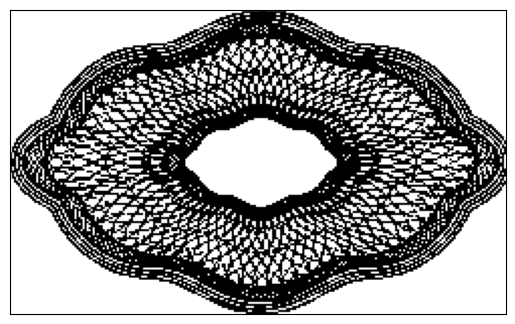

In [15]:
fig, ax = plt.subplots()
bw_wm = get_bw_wm(wm)
ax.imshow(bw_wm, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
display()

Розглаянемо випадок коли пітрібно циклічно вбудувати WM

In [16]:
def get_resized_bw_wm(bw_wm: np.ndarray, resized_shape: tuple) -> np.ndarray:
    resized_wm = np.zeros(resized_shape)
    h, w = bw_wm.shape[:2]
    dh = resized_shape[0]/bw_wm.shape[0]
    dw = resized_shape[1]/bw_wm.shape[1]
    
    for i in range( int(np.ceil(dh)) ):
    
        if (i + 1) * h > resized_shape[0]:
            border_height = resized_shape[0]
        else:
            border_height = (i + 1) * h
    
        for j in range( int(np.ceil(dw)) ):
    
            if (j + 1) * w > resized_shape[1]:
                border_width = resized_shape[1]
            else:
                border_width = (j + 1) * w
    
            resized_wm[i * h: border_height, j * w: border_width] = bw_wm[0: border_height - i * h, 0: border_width - j * w]
    return resized_wm
    

[['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']
 ['1' '1' '1' ... '1' '1' '1']
 ...
 ['1' '1' '1' ... '1' '0' '0']
 ['1' '1' '1' ... '0' '1' '0']
 ['1' '1' '1' ... '0' '0' '0']]


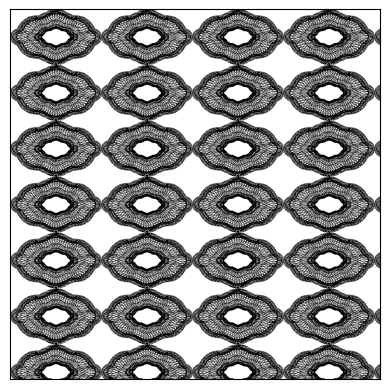

In [17]:
resized_bw_wm = get_resized_bw_wm(bw_wm, (1000, 1000))
print((resized_bw_wm//255).astype("int8").astype("str"))
fig, ax = plt.subplots()
bw_wm = get_bw_wm(wm)
ax.imshow(resized_bw_wm, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
display()

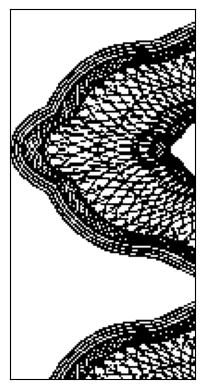

In [18]:
resized_bw_wm = get_resized_bw_wm(bw_wm, (200, 100))

fig, ax = plt.subplots()
bw_wm = get_bw_wm(wm)
ax.imshow(resized_bw_wm, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
display()

<h3 align="center">Процес для вбудовування WM до Input Image</h3>

<h4 align="center">Зміна бітової площини</h4>

In [19]:
def img_bit_space_change(_input_img: np.ndarray, _wm: np.ndarray, bin_space: int, color_chanel: int) -> np.ndarray:
    ii = _input_img.copy()
    
    bw_WM = get_bw_wm(_wm.copy())
    WM = get_resized_bw_wm(bw_WM, ii.shape[:2])
    bin_WM = (1-WM//255).astype("int8").astype("str")
    
    bin_input_img = _to_binary(ii[:, :, color_chanel])

    changed_img = change_bin_space(bin_input_img, bin_WM, bin_space)

    ii[:, :, color_chanel] = back_to_int(changed_img).astype("uint8")
    return ii

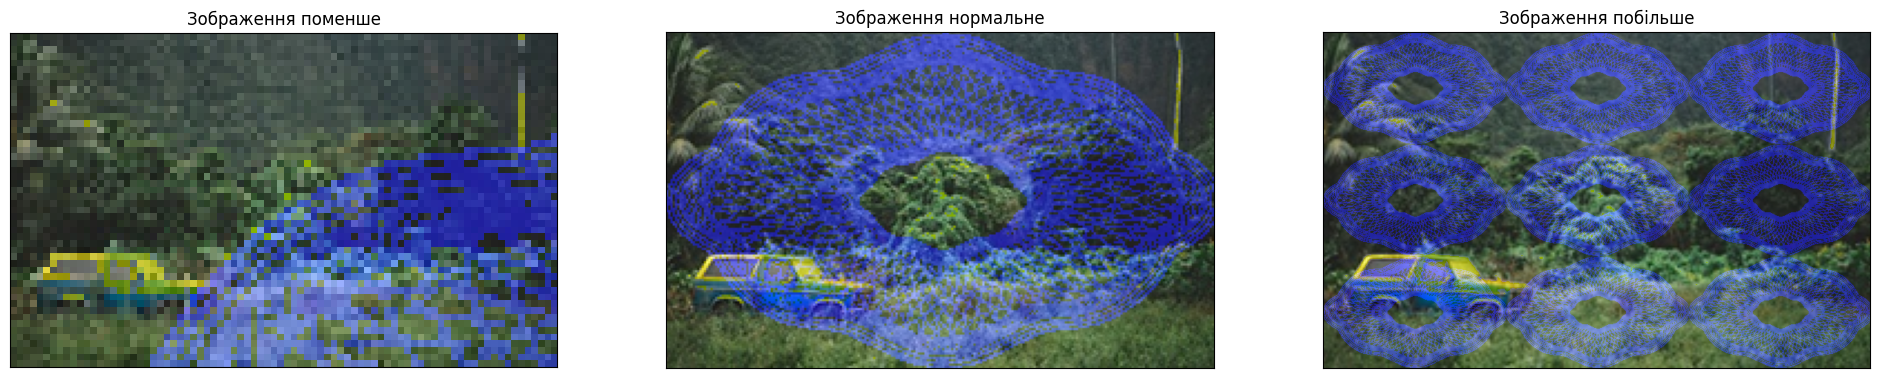

In [34]:
test_img_by_change = img_bit_space_change(input_img, wm, 8, 2)

fig, ax = plt.subplots(1, 3, figsize=(24, 8))

ax[0].set_title("Зображення поменше")
ax[0].imshow(img_bit_space_change(small_input_img, wm, 8, 2))
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].set_title("Зображення нормальне")
ax[1].imshow(img_bit_space_change(input_img, wm, 8, 2))
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[2].set_title("Зображення побільше")
ax[2].imshow(img_bit_space_change(big_input_img, wm, 8, 2))
ax[2].set_xticks([])
ax[2].set_yticks([])
display()

<h4 align="center">Вбудування за допомогою xor і вилучення WM з контейнера</h4>

In [21]:
def img_bit_space_xor(_input_img: np.ndarray, _wm: np.ndarray, bin_space: int, color_chanel: int) -> np.ndarray:
    ii = _input_img.copy()
    
    bw_WM = get_bw_wm(_wm.copy())
    WM = get_resized_bw_wm(bw_WM, ii.shape[:2])
    bin_WM = (1-WM//255).astype("int8").astype("str")
    
    bin_input_img = _to_binary(ii[:, :, color_chanel])

    changed_img = xor_bin_space(bin_input_img, bin_WM, bin_space)

    ii[:, :, color_chanel] = back_to_int(changed_img).astype("uint8")
    return ii

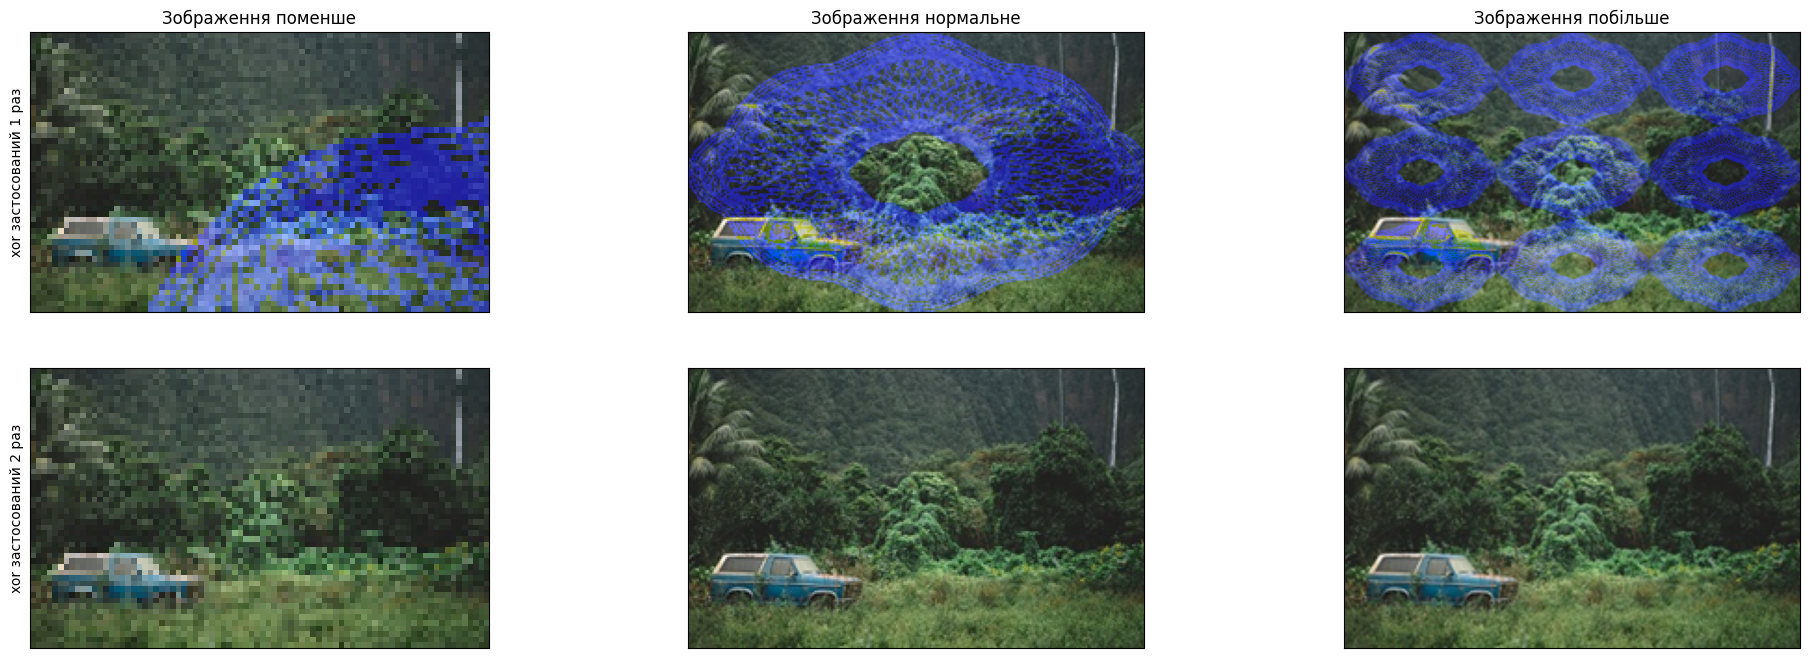

In [39]:
test_img_by_xor = img_bit_space_xor(input_img, wm, 8, 2)
test_img_by_xor2 = img_bit_space_xor(test_img_by_xor, wm, 8, 2)


fig, ax = plt.subplots(2, 3, figsize=(24, 8))
ax[0, 0].set_ylabel("xor застосований 1 раз")
ax[0, 0].set_title("Зображення поменше")
ax[0, 0].imshow(img_bit_space_xor(small_input_img, wm, 8, 2))
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

ax[0, 1].set_title("Зображення нормальне")
ax[0, 1].imshow(img_bit_space_xor(input_img, wm, 8, 2))
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])

ax[0, 2].set_title("Зображення побільше")
ax[0, 2].imshow(img_bit_space_xor(big_input_img, wm, 8, 2))
ax[0, 2].set_xticks([])
ax[0, 2].set_yticks([])


ax[1, 0].set_ylabel("xor застосований 2 раз")
ax[1, 0].imshow(img_bit_space_xor(img_bit_space_xor(small_input_img, wm, 8, 2), wm, 8, 2))
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

ax[1, 1].imshow(img_bit_space_xor(img_bit_space_xor(input_img, wm, 8, 2), wm, 8, 2))
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])

ax[1, 2].imshow(img_bit_space_xor(img_bit_space_xor(big_input_img, wm, 8, 2), wm, 8, 2))
ax[1, 2].set_xticks([])
ax[1, 2].set_yticks([])
display()

<h3 align="center">Вбудовування тексту в зображення</h3>

<h4 align="center">Пре операції до вбодування тексту в зображення</h4>

In [23]:
def str_to_bin_8(string):
    binary_string = ''.join(format(ord(char), '08b') for char in string)
    return binary_string
    

In [24]:
bin_str_test = str_to_bin_8("hello world")
bin_str_test

'0110100001100101011011000110110001101111001000000111011101101111011100100110110001100100'

In [25]:
array_text = np.array(list(bin_str_test))
print(f"Array of text on bin: {array_text}")
print(f"Size of this array: {array_text.size}")
print(np.array(list(format(array_text.size, '032b'))).size)

test_concat_text_arr = np.concatenate([np.array(list(format(array_text.size, '032b'))), array_text])
test_concat_text_arr

Array of text on bin: ['0' '1' '1' '0' '1' '0' '0' '0' '0' '1' '1' '0' '0' '1' '0' '1' '0' '1'
 '1' '0' '1' '1' '0' '0' '0' '1' '1' '0' '1' '1' '0' '0' '0' '1' '1' '0'
 '1' '1' '1' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '1' '0' '1'
 '1' '1' '0' '1' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '0' '0' '1' '0'
 '0' '1' '1' '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '1' '0' '0']
Size of this array: 88
32


array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0',
       '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0',
       '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0',
       '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1',
       '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0',
       '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '0', '0'], dtype='<U1')

In [26]:
test_size_text = format(array_text.size, '032b')
''.join(test_concat_text_arr[:32])
int(''.join(test_concat_text_arr[:32]), 2)

88

In [27]:
def change_bin_space_for_text(arr: np.ndarray, bin_array_text: np.ndarray, bin_space: int) -> np.ndarray[str] | None:
    if 1>bin_space or bin_space>8:
        print(f"Bin space number is not correct: {bin_space}")
        return None
    bin_space = 8 - bin_space

    bin_array_text = np.concatenate([np.array(list(format(bin_array_text.size, '032b'))), 
                                     bin_array_text])
    print(np.array(list(format(bin_array_text.size, '032b'))).size)
    if arr.size < bin_array_text.size:
        print(f"Error shape: arr shape is {arr.size}, bin_arr shape is {bin_array_text.size}")
        return None

    arr_shape = arr.shape
    
    add_arr = np.reshape(arr.copy(), arr.size)
    for i in range(bin_array_text.size):
        add_arr[i] = add_arr[i][:bin_space]+bin_array_text[i]+add_arr[i][bin_space+1:]
    
    return np.reshape(add_arr, arr_shape)

<h4 align="center">Функція вбудування тексту в зображення</h4>

In [28]:
def img_bit_space_text(_input_img: np.ndarray, text: str, bin_space: int, color_chanel: int) -> np.ndarray:
    ii = _input_img.copy()
    
    text_to_bin = str_to_bin_8(text)
    text_to_array_bin = np.array(list(text_to_bin))
    
    bin_input_img = _to_binary(ii[:, :, color_chanel])
    changed_img = change_bin_space_for_text(bin_input_img, text_to_array_bin , bin_space)
    
    ii[:, :, color_chanel] = back_to_int(changed_img).astype("uint8")
    return ii

32


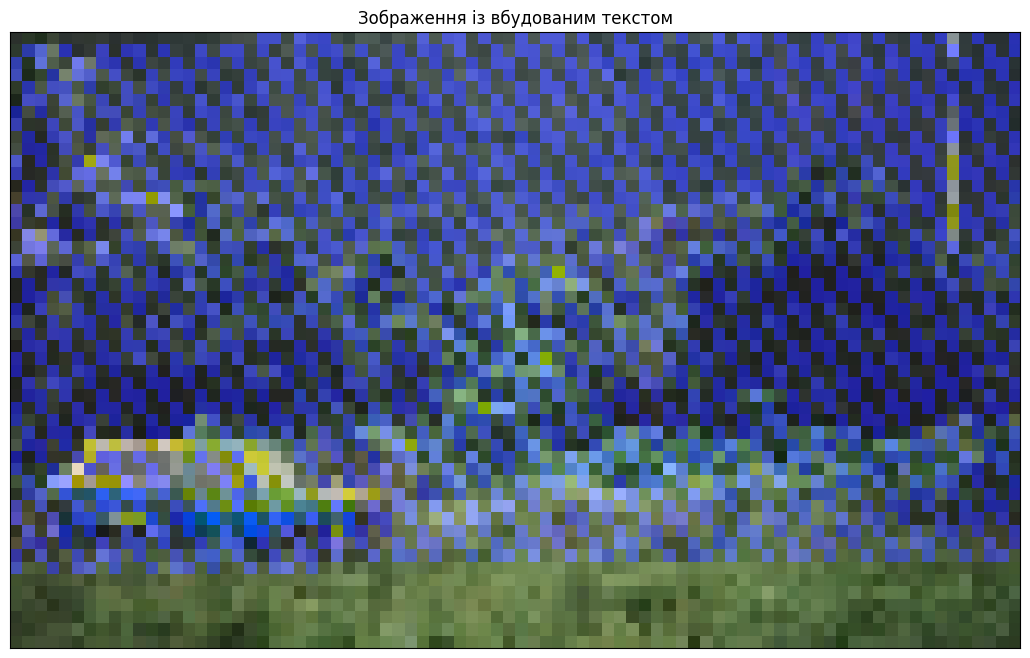

In [29]:
text = "ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ"*8
test_img_with_text = img_bit_space_text(small_input_img, text, 8, 2)


fig, ax = plt.subplots(figsize=(24, 8))
ax.set_title("Зображення із вбудованим текстом")
ax.imshow(test_img_with_text)
ax.set_xticks([])
ax.set_yticks([])
display()

<h4 align="center">Процес отримання тексту із зображення</h4>

In [30]:
def bin_to_str(binary_string):
    chunks = [binary_string[i:i+8] for i in range(0, len(binary_string), 8)]
    char_list = [chr(int(chunk, 2)) for chunk in chunks]
    original_string = ''.join(char_list)
    return original_string

bin_to_str(str_to_bin_8("Hello world_check SOME symbols!"))


'Hello world_check SOME symbols!'

In [31]:
def img_get_text(_input_img: np.ndarray, bin_space: int, color_chanel: int) -> str:
    ii = _input_img
    ii_to_bin = _to_binary(ii[:, :, color_chanel])
    ii_to_bin = np.reshape(ii_to_bin, ii_to_bin.size)
    ii_of_bin_space = get_bin_space(ii_to_bin, bin_space) 
    count_of_pixel_to_read = int(''.join(ii_of_bin_space[:32]), 2)
    return bin_to_str(''.join(ii_of_bin_space[32: count_of_pixel_to_read]))
    

In [32]:
img_get_text(test_img_with_text, 8, 2)

'ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ'